In [41]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import sklearn.metrics as metrics
import torch
from torch.utils import tensorboard
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix


In [42]:
# Load the datasets
credit_record = pd.read_csv("credit_record.csv")
application_record = pd.read_csv("application_record.csv")

In [43]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [44]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [45]:
application_record.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [46]:
#delete duplicate id
application_record_no_duplicates = application_record.drop_duplicates(subset='ID', keep=False, inplace=False)

In [47]:
application_record_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438463 non-null  int64  
 1   CODE_GENDER          438463 non-null  object 
 2   FLAG_OWN_CAR         438463 non-null  object 
 3   FLAG_OWN_REALTY      438463 non-null  object 
 4   CNT_CHILDREN         438463 non-null  int64  
 5   AMT_INCOME_TOTAL     438463 non-null  float64
 6   NAME_INCOME_TYPE     438463 non-null  object 
 7   NAME_EDUCATION_TYPE  438463 non-null  object 
 8   NAME_FAMILY_STATUS   438463 non-null  object 
 9   NAME_HOUSING_TYPE    438463 non-null  object 
 10  DAYS_BIRTH           438463 non-null  int64  
 11  DAYS_EMPLOYED        438463 non-null  int64  
 12  FLAG_MOBIL           438463 non-null  int64  
 13  FLAG_WORK_PHONE      438463 non-null  int64  
 14  FLAG_PHONE           438463 non-null  int64  
 15  FLAG_EMAIL       

In [48]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [49]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [50]:
credit_record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [51]:
#Create a new df with a column id
credit_decision = pd.DataFrame()
credit_decision['ID'] = credit_record['ID'].unique()

In [52]:
#Determine if the client has a bad status, good satus or nothing with 'X'
def decision(id):

    # different status
    good = ['0','C']
    bad = ['1', '2', '3', '4', '5']
    noinformation = ['X']

    client_status = credit_record[credit_record['ID'] == id]['STATUS'].tolist()

    if any(status in bad for status in client_status):
        return 1

    elif all(status in noinformation for status in client_status):
        return -1

    else:
        return 0

In [53]:
# Creates a 'Decision' column in credit_decision and call the function decision
credit_decision['Decision'] = credit_decision['ID'].map(decision)

In [54]:
credit_decision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        45985 non-null  int64
 1   Decision  45985 non-null  int64
dtypes: int64(2)
memory usage: 718.6 KB


In [55]:
credit_decision['Decision'].value_counts()

 0    36099
 1     5350
-1     4536
Name: Decision, dtype: int64

In [56]:
credit_decision = credit_decision[credit_decision['Decision']!=-1] #delete the people who don't have status ('X')

In [57]:
credit_decision['Decision'].value_counts()

0    36099
1     5350
Name: Decision, dtype: int64

In [58]:
#Add the column decision into the dataset Thedata
Thedata = pd.merge(credit_decision,application_record_no_duplicates)

In [59]:
Thedata.head()

,ID,Decision,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008810,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [60]:
FinalData=Thedata

In [61]:
#positive values
def transformation(value):
    return -value if value < 0 else 0

In [62]:
FinalData['DAYS_EMPLOYED'] = FinalData['DAYS_EMPLOYED'].apply(transformation)
FinalData['DAYS_BIRTH'] = FinalData['DAYS_BIRTH'].apply(transformation)

In [63]:
FinalData.head()

,ID,Decision,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0
1,5008805,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0
2,5008806,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0
3,5008808,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0
4,5008810,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0


In [64]:
FinalData.loc[FinalData['DAYS_EMPLOYED'] == 0, 'OCCUPATION_TYPE'] = 'not_working'

In [65]:
FinalData.head()

,ID,Decision,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0
1,5008805,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0
2,5008806,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0
3,5008808,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0
4,5008810,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0


In [66]:
#delete no until columns
FinalData = FinalData.drop(['ID','CODE_GENDER', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis=1)

In [67]:
FinalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33110 entries, 0 to 33109
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Decision             33110 non-null  int64  
 1   FLAG_OWN_CAR         33110 non-null  object 
 2   FLAG_OWN_REALTY      33110 non-null  object 
 3   CNT_CHILDREN         33110 non-null  int64  
 4   AMT_INCOME_TOTAL     33110 non-null  float64
 5   NAME_INCOME_TYPE     33110 non-null  object 
 6   NAME_EDUCATION_TYPE  33110 non-null  object 
 7   NAME_FAMILY_STATUS   33110 non-null  object 
 8   NAME_HOUSING_TYPE    33110 non-null  object 
 9   DAYS_BIRTH           33110 non-null  int64  
 10  DAYS_EMPLOYED        33110 non-null  int64  
 11  OCCUPATION_TYPE      28379 non-null  object 
 12  CNT_FAM_MEMBERS      33110 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 3.5+ MB


In [68]:
# Separates categorical variables to have numerical values
stringtonumericalvalues = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

In [69]:
FinalData[stringtonumericalvalues].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
1,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
2,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff
3,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
4,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff


In [70]:
# categorical variables => numerical data
FinalData[stringtonumericalvalues]= FinalData[stringtonumericalvalues].apply(lambda x: pd.factorize(x)[0])

In [71]:
FinalData.head()

,Decision,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,0,0,0,427500.0,0,0,0,0,12005,4542,-1,2.0
1,1,0,0,0,427500.0,0,0,0,0,12005,4542,-1,2.0
2,0,0,0,0,112500.0,0,1,1,1,21474,1134,0,2.0
3,0,1,0,0,270000.0,1,1,2,1,19110,3051,1,1.0
4,0,1,0,0,270000.0,1,1,2,1,19110,3051,1,1.0


In [72]:
FinalData.describe()

,Decision,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,33110.000000,33110.000000,33110.000000,33110.000000,3.311000e+04,33110.000000,33110.000000,33110.000000,33110.000000,33110.000000,33110.000000,33110.000000,33110.000000
mean,0.129598,0.622712,0.326850,0.427756,1.858772e+05,0.821413,0.793899,1.294684,1.152915,16007.262489,2206.995862,3.948988,2.194654
std,0.335866,0.484715,0.469069,0.741716,1.014124e+05,0.994154,0.560824,0.857368,0.609528,4213.387673,2379.690262,3.662013,0.911076
min,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,7705.000000,0.000000,-1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.215000e+05,0.000000,0.000000,1.000000,1.000000,12461.000000,405.000000,1.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,1.575000e+05,0.000000,1.000000,1.000000,1.000000,15646.000000,1552.000000,4.000000,2.000000
75%,0.000000,1.000000,1.000000,1.000000,2.250000e+05,2.000000,1.000000,1.000000,1.000000,19495.000000,3159.000000,6.000000,3.000000
max,1.000000,1.000000,1.000000,19.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,25152.000000,15713.000000,18.000000,20.000000


In [73]:
y = FinalData["Decision"]
x = FinalData.drop("Decision", axis = 1)
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
#Random Forest
ThemodelRF = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

In [75]:
ThemodelRF.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto')

Accuracy Score: 87.828451 %

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      5770
           1       0.54      0.35      0.42       852

    accuracy                           0.88      6622
   macro avg       0.73      0.65      0.68      6622
weighted avg       0.86      0.88      0.87      6622



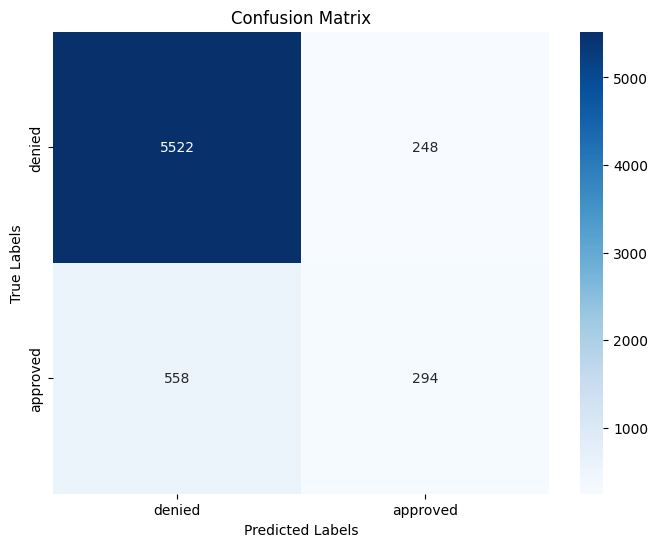

In [76]:
#Print the results
y_pred = ThemodelRF.predict(x_test)

print("Accuracy Score: {:2f} %".format(accuracy_score(y_test, y_pred)*100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

df_confusion = pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=["denied", "approved"],
             columns=["denied", "approved"])

plt.figure(figsize=(8, 6))
sns.heatmap(df_confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


In [77]:
#print the importance of each label (in %)
pd.DataFrame(ThemodelRF.feature_importances_,
              index = x_train.columns,
              columns = ["importance"]).sort_values(
     "importance",
     ascending = False)

,importance
DAYS_BIRTH,0.288637
DAYS_EMPLOYED,0.209123
AMT_INCOME_TOTAL,0.176434
OCCUPATION_TYPE,0.081978
NAME_FAMILY_STATUS,0.043056
NAME_EDUCATION_TYPE,0.037215
NAME_INCOME_TYPE,0.036364
CNT_FAM_MEMBERS,0.035488
NAME_HOUSING_TYPE,0.024981
FLAG_OWN_CAR,0.024551


In [78]:
writer=tensorboard.SummaryWriter('models')

In [79]:
with open('models/ThemodelRF.pkl','wb') as f:
  pickle.dump(ThemodelRF,f)
print(ThemodelRF)

RandomForestClassifier(max_features='auto')
